# Анализ результатов АБ-теста

In [21]:
import numpy as np
import pandas as pd

В данном задании вам нужно будет

- проанализировать АБ тест, проведенный на реальных пользователях Яндекса
- подтвердить или опровергнуть наличие изменений в пользовательском поведении между контрольной (control) и тестовой (exp) группами
- определить характер этих изменений и практическую значимость вводимого изменения
- понять, какая из пользовательских групп более всего проигрывает / выигрывает от тестируемого изменения (локализовать изменение)

In [22]:
data= pd.read_csv('ab_browser_test.csv', sep=',')

In [23]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [24]:
data.shape

(566134, 6)

Описание данных:
- userID: уникальный идентификатор пользователя
- browser: браузер, который использовал userID
- slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
- n_clicks: количество кликов, которые пользоваль совершил за n_queries
- n_queries: количество запросов, который совершил userID, пользуясь браузером browser
- n_nonclk_queries: количество запросов пользователя, в которых им не было совершено ни одного клика

# Задание №1

Основная метрика, на которой мы сосредоточимся в этой работе, — это **количество пользовательских кликов на web-странице** в зависимости от тестируемого изменения этой страницы.

Посчитайте, насколько в группе exp больше пользовательских кликов n_clicks по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.

In [25]:
data['slot'][3] == 'control'

True

In [26]:
data['n_clicks'][0] 

23

In [27]:
#Сначала просто посчитаем, сколько кликов в группе exp и в control
n_clicks_control = 0
n_clicks_exp = 0
for i in range(data.shape[0]):
    if data['slot'][i] == 'exp':
        n_clicks_exp+= data['n_clicks'][i]
    else:
        n_clicks_control+= data['n_clicks'][i]

In [28]:
print(n_clicks_control)
print(n_clicks_exp)

3210027
3261823


In [29]:
n_clicks_exp-n_clicks_control #настолько кликов больше на измененной страничке

51796

In [30]:
51796*100/3210027  #ответ 1.614

1.6135689824415806

In [31]:
round(1.6135689824415806, 3)

1.614

Ответ: 1.614

# Задание №2

Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для **средних значений и медиан** количества кликов n_clicks в каждой из двух групп. Отметьте все верные утверждения.

In [32]:
a = np.random.randint(1,7, 3)
a

array([5, 2, 5])

In [33]:
def get_bootstrap_samples(data, n_samples):
    for i in range(n_samples):
        indices = np.random.randint(0, len(data), (n_samples, len(data)))
        sample = data[indices]
        return sample

In [34]:
def stat_intervals(stat, alpha):
    #boundaries = np.percentile(stat, 100 * (1 - alpha / 2.))
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [35]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [36]:
data_exp = data[data.slot== 'exp'].n_clicks.values
data_control = data[data.slot=='control'].n_clicks.values

In [37]:
data_control

array([12,  4, 22, ...,  1,  0,  2])

In [38]:
sum(data_exp)/281580

11.584000994388806

In [39]:
np.random.seed(0)
#считаем наши статистики:
ilec_median_scores = list(map(np.median, get_bootstrap_samples(data_exp, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(data_control, 1000)))

print("95% confidence interval for the ILEC median repair time:",
                                          stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",
                                          stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [5. 5.]
95% confidence interval for the CLEC median repair time: [4. 4.]


In [40]:
#точечная оценка разности медиан
print("difference between medians:", np.median(data_exp) - np.median(data_control))

difference between medians: 1.0


In [41]:
#интервальная оценка разности медиан
delta_median_scores = list(map(lambda x: x[1] - x[0], 
                                                   zip(ilec_median_scores, clec_median_scores)))

In [42]:
print(len(delta_median_scores))

1000


In [43]:
print("95% confidence interval for the difference between medians",
                                                      stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-1. -1.]


In [44]:
np.random.seed(0)
#считаем наши статистики:
ilec_median_scores2 = list(map(np.mean, get_bootstrap_samples(data_exp, 1000)))
clec_median_scores2 = list(map(np.mean, get_bootstrap_samples(data_control, 1000)))

print("95% confidence interval for the ILEC median repair time:",
                                          stat_intervals(ilec_median_scores2, 0.05))
print("95% confidence interval for the CLEC median repair time:",
                                          stat_intervals(clec_median_scores2, 0.05))

95% confidence interval for the ILEC median repair time: [11.5086867  11.66089388]
95% confidence interval for the CLEC median repair time: [11.20795095 11.35742732]


In [45]:
#точечная оценка разности медиан
print("difference between medians:", np.mean(data_exp) - np.mean(data_control))

difference between medians: 0.3030947340656329


In [46]:
#интервальная оценка разности медиан
delta_mean_scores = list(map(lambda x: x[1] - x[0], 
                                                   zip(ilec_median_scores2, clec_median_scores2)))

# Задание №4

t-критерий Стьюдента имеет множество достоинств, и потому его достаточно часто применяют в AB экспериментах. Иногда его применение может быть необоснованно из-за сильной скошенности распределения данных.      
Давайте постараемся понять, когда t-критерий можно применять и как это проверить на реальных данных.

Кратко: Поскольку мы не знаем истинного распределения генеральной совокупности, мы можем применить бутстреп, чтобы понять, как распределены среднее значение и выборочная дисперсия. Для этого:
- Получите из данных n_boot_samples псевдовыборок.
- По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)
Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения
- Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot - для хи-квадрат распределения с помощью команды

будем считать нашими данными только контрольную группу data_control = data[data.slot=='control'].n_clicks.values

Мы будем работать с data_control. Это вектор, в котором лежат кол-во кликов всех людей из группы control

In [47]:
data.shape

(566134, 6)

In [48]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [49]:
data_control = data[data['slot']=='control']

In [50]:
def get_bootstrap_samples(data_control, n_samples):
    for i in range(n_samples):
        indices = np.random.randint(0, len(data_control), (n_samples, len(data)))
        sample = data[indices]
        return sample

### a) 

In [51]:
np.random.seed(0)
n_boot_samples = 500
#1. Получите из данных n_boot_samples псевдовыборок
#у нас уже есть функция get_bootstrap_samples(data, n):
n_samples = get_bootstrap_samples(data_control, n_boot_samples)

KeyboardInterrupt: 

In [ ]:
n_samples.shape

In [ ]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12])

## b) По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared) 

In [ ]:
sample_mean_list=[]  #сюда запишем 500 средних наших выборок
control_boot_chi_squared=0
#from scipy.stats import chisquare
for i in range(len(n_samples)):  #=500
    sample_mean = np.mean(n_samples[i])
    sample_mean_list.append(sample_mean)  #вектор средних значений из n_boot_samples

In [235]:
type(n_samples)

numpy.ndarray

In [144]:
#3.
from scipy import stats
from scipy.stats import probplot
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Средние значения')

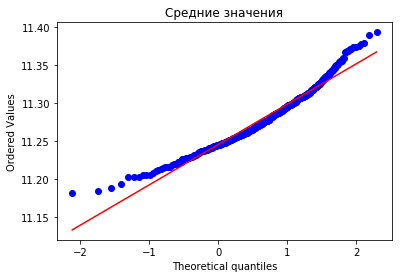

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(sample_mean_list, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("Средние значения")

In [150]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [182]:
data_exp2 = data[data.slot== 'exp'].n_clicks
data_control2 = data[data.slot=='control'].n_clicks

# Задание №5

In [238]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [237]:
# 4. Тест Манна-Уитни
# у нас есть две группы: data_exp и data_control
u, p_value = stats.mannwhitneyu(data_control2, data_exp2)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 3.1236179006848145e-75


Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является **тест Манна-Уитни**. На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ? Выберите все правильные ответы

In [137]:
np.mean(n_samples[1])
sum(n_samples[1])/284554

11.258428980088137

In [116]:
n_samples.shape

(500, 284554)

In [ ]:
get_bootstrap_samples(data_control, n_boot_samples)

In [90]:
a=[100,200,300,400,500]
aa=np.random.randint(0, len(a), (4,3))
aa

array([[3, 4, 1],
       [2, 4, 3],
       [4, 4, 4],
       [3, 4, 4]])

In [ ]:
def get_ootstrap_samples(data, n_samples):
    samples=[]
    indexes=np.random.
    data['n_clicks]

# Задание №7

Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

Сходятся ли результаты проведенного Вами анализа с показателем процента некликнутых запросов ? Отметьте все верные утверждения.

In [6]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [9]:
data_control = data[data['slot']=='control']
data_exp = data[data['slot']=='exp']

In [17]:
# долю запросов в группе EXP, в которых пользователь не кликнул ни разу
(sum(data_exp['n_nonclk_queries'])/sum(data_exp['n_queries']))*100  

42.69887343806424

In [18]:
(sum(data_control['n_nonclk_queries'])/sum(data_control['n_queries']))*100  

45.0179084208453

In [12]:
sum(data_exp['n_nonclk_queries'])  #было: 3261823
#стало меньше

1273467

In [13]:
sum(data_control['n_nonclk_queries'])  #было:3210027

1389620

In [248]:
data['slot'][1]=='exp'

True

In [258]:
sum_zero=0
non_click_exp_1=0
non_click_control_1=0
non_click_exp_2=0
non_click_control_2=0
for i in range(len(data)):  #566134
    if data['slot'][i]=='exp':
        non_click_exp_1 += data['n_nonclk_queries'][i]
        non_click_exp_2 += data['n_queries'][i]
    else:
        non_click_control_1 += data['n_nonclk_queries'][i]
        non_click_control_2 +=data['n_queries'][i]
print('exp:',non_click_exp_1/non_click_exp_2*100 )
print('control:',non_click_control_1/non_click_control_2 *100 )

exp: 42.69887343806424
control: 45.0179084208453


In [253]:
non_click_exp

117835.5029003171